In [1]:
import numpy as np
import pandas as pd
import cv2
import pytesseract as pt 
import spacy
import re
import string
from PIL import Image


In [2]:
def cleanText(txt):
  whitespace=string.whitespace
  punctuation = '!#$%&\'()*+:;<=>?[\\]^`{|}~'

  tableWhitespace = str.maketrans('','',whitespace)
  tablePunctuation = str.maketrans('','',punctuation)
  text = str(txt)
  text = text.lower()
  removewhitespace = text.translate(tableWhitespace)
  removepunctuation = removewhitespace.translate(tablePunctuation)

  return str(removepunctuation)

In [3]:
model_ner = spacy.load(r"C:\Users\Debajyoti\OneDrive\Desktop\Project 2\Train_NER\output\model-best")


In [4]:
image = Image.open(r"C:\Users\Debajyoti\OneDrive\Desktop\Project 2\Selected\060.jpeg")

testData = pt.image_to_data(image)

dataList  = list(map(lambda x:x.split('\t'),testData.split('\n')))
data_df = pd.DataFrame(dataList[1:],columns = dataList[0])
data_df.dropna(inplace=True)

data_df['text'] = data_df['text'].apply(cleanText)

df_clean = data_df.query('text != "" ')
content = " ".join([w for w in df_clean['text']])
print(content)


y university of south australia dr jonathan smithiskywich pho, msc, bsc hons senior lecturer t 61 8 8302 0000 school of nursing and midwifery m 61 422 333555 division of health sciences jonathan.smithiskywich@unisa.edu.au www.unisa.edu.au/itee/cangoon/forever gpo box 2471, adelaide, south australia 5001


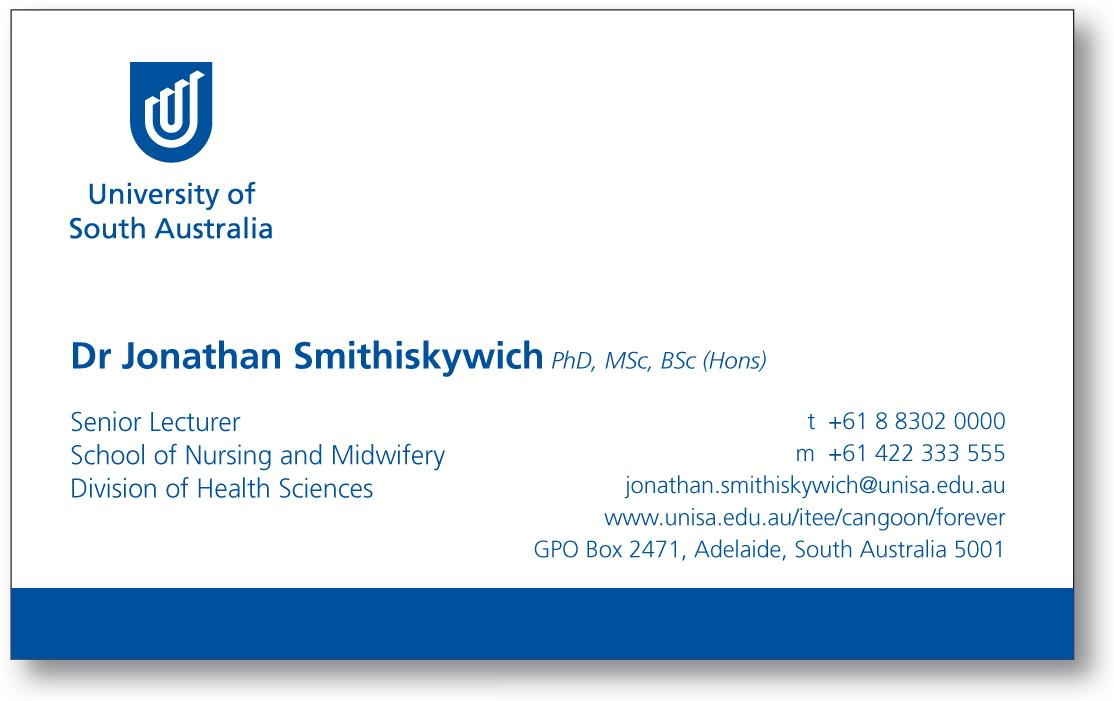

In [5]:
image

In [6]:
doc = model_ner(content)
doc

y university of south australia dr jonathan smithiskywich pho, msc, bsc hons senior lecturer t 61 8 8302 0000 school of nursing and midwifery m 61 422 333555 division of health sciences jonathan.smithiskywich@unisa.edu.au www.unisa.edu.au/itee/cangoon/forever gpo box 2471, adelaide, south australia 5001

In [7]:
from spacy import displacy


In [8]:
displacy.serve(doc,style="ent")

c:\Users\Debajyoti\AppData\Local\Programs\Python\Python312\Lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [9]:
displacy.render(doc,style="ent")

In [10]:
doc_json = doc.to_json()
doc_json

{'text': 'y university of south australia dr jonathan smithiskywich pho, msc, bsc hons senior lecturer t 61 8 8302 0000 school of nursing and midwifery m 61 422 333555 division of health sciences jonathan.smithiskywich@unisa.edu.au www.unisa.edu.au/itee/cangoon/forever gpo box 2471, adelaide, south australia 5001',
 'ents': [{'start': 0, 'end': 1, 'label': 'B-ORG'},
  {'start': 2, 'end': 12, 'label': 'I-ORG'},
  {'start': 13, 'end': 15, 'label': 'I-ORG'},
  {'start': 16, 'end': 21, 'label': 'I-ORG'},
  {'start': 22, 'end': 31, 'label': 'I-ORG'},
  {'start': 32, 'end': 34, 'label': 'B-NAME'},
  {'start': 35, 'end': 43, 'label': 'I-NAME'},
  {'start': 44, 'end': 57, 'label': 'I-NAME'},
  {'start': 77, 'end': 83, 'label': 'B-DES'},
  {'start': 84, 'end': 92, 'label': 'I-DES'},
  {'start': 105, 'end': 109, 'label': 'B-PHONE'},
  {'start': 144, 'end': 146, 'label': 'B-PHONE'},
  {'start': 147, 'end': 150, 'label': 'I-PHONE'},
  {'start': 151, 'end': 157, 'label': 'I-PHONE'},
  {'start': 186

In [11]:
doc_json.keys()

dict_keys(['text', 'ents', 'tokens'])

In [12]:
doc_text = doc_json['text']
doc_text

'y university of south australia dr jonathan smithiskywich pho, msc, bsc hons senior lecturer t 61 8 8302 0000 school of nursing and midwifery m 61 422 333555 division of health sciences jonathan.smithiskywich@unisa.edu.au www.unisa.edu.au/itee/cangoon/forever gpo box 2471, adelaide, south australia 5001'

In [13]:
dataframe_tag = pd.DataFrame(doc_json['tokens'])
dataframe_tag.head()

,id,start,end
0,0,0,1
1,1,2,12
2,2,13,15
3,3,16,21
4,4,22,31


In [14]:
dataframe_tag['token'] = dataframe_tag[['start','end']].apply(lambda x:doc_text[x[0]:x[1]],axis=1)
dataframe_tag.head()

C:\Users\Debajyoti\AppData\Local\Temp\ipykernel_13296\2296122443.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataframe_tag['token'] = dataframe_tag[['start','end']].apply(lambda x:doc_text[x[0]:x[1]],axis=1)


,id,start,end,token
0,0,0,1,y
1,1,2,12,university
2,2,13,15,of
3,3,16,21,south
4,4,22,31,australia


In [15]:
doc_text[5:11]

'versit'

In [16]:
right_table = pd.DataFrame(doc_json['ents'])[['start','label']]
dataframe_tag = pd.merge(dataframe_tag,right_table,how='left',on='start')


In [17]:
dataframe_tag.fillna('O',inplace=True)
dataframe_tag.head()

,id,start,end,token,label
0,0,0,1,y,B-ORG
1,1,2,12,university,I-ORG
2,2,13,15,of,I-ORG
3,3,16,21,south,I-ORG
4,4,22,31,australia,I-ORG


In [18]:
df_clean

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
12,5,1,3,1,1,1,145,71,59,77,34.092269,y
16,5,1,4,1,1,1,90,183,129,27,96.308664,university
17,5,1,4,1,1,2,228,182,27,22,96.744178,of
19,5,1,4,1,2,1,70,217,75,22,96.182354,south
20,5,1,4,1,2,2,155,217,117,22,96.182354,australia
24,5,1,5,1,1,1,73,342,38,27,96.081749,dr
25,5,1,5,1,1,2,122,340,158,29,93.298265,jonathan
26,5,1,5,1,1,3,295,340,247,37,90.540634,smithiskywich
27,5,1,5,1,1,4,552,350,43,22,75.645978,"pho,"
28,5,1,5,1,1,5,606,352,45,20,75.404809,"msc,"


In [19]:
df_clean['end'] = df_clean['text'].apply(lambda x:len(x)+1).cumsum()-1
df_clean['start'] = df_clean[['text','end']].apply(lambda x:x[1]-len(x[0]),axis=1)

C:\Users\Debajyoti\AppData\Local\Temp\ipykernel_13296\1403935437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['end'] = df_clean['text'].apply(lambda x:len(x)+1).cumsum()-1
C:\Users\Debajyoti\AppData\Local\Temp\ipykernel_13296\1403935437.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_clean['start'] = df_clean[['text','end']].apply(lambda x:x[1]-len(x[0]),axis=1)
C:\Users\Debajyoti\AppData\Local\Temp\ipykernel_13296\1403935437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [20]:
df_clean.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start
12,5,1,3,1,1,1,145,71,59,77,34.092269,y,1,0
16,5,1,4,1,1,1,90,183,129,27,96.308664,university,12,2
17,5,1,4,1,1,2,228,182,27,22,96.744178,of,15,13
19,5,1,4,1,2,1,70,217,75,22,96.182354,south,21,16
20,5,1,4,1,2,2,155,217,117,22,96.182354,australia,31,22


In [21]:
df_info = pd.merge(df_clean,dataframe_tag[['start','token','label']],how='inner',on='start')

In [22]:
df_info.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,3,1,1,1,145,71,59,77,34.092269,y,1,0,y,B-ORG
1,5,1,4,1,1,1,90,183,129,27,96.308664,university,12,2,university,I-ORG
2,5,1,4,1,1,2,228,182,27,22,96.744178,of,15,13,of,I-ORG
3,5,1,4,1,2,1,70,217,75,22,96.182354,south,21,16,south,I-ORG
4,5,1,4,1,2,2,155,217,117,22,96.182354,australia,31,22,australia,I-ORG


In [23]:
bb_df = df_info.query("label != 'O' ")
bb_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,3,1,1,1,145,71,59,77,34.092269,y,1,0,y,B-ORG
1,5,1,4,1,1,1,90,183,129,27,96.308664,university,12,2,university,I-ORG
2,5,1,4,1,1,2,228,182,27,22,96.744178,of,15,13,of,I-ORG
3,5,1,4,1,2,1,70,217,75,22,96.182354,south,21,16,south,I-ORG
4,5,1,4,1,2,2,155,217,117,22,96.182354,australia,31,22,australia,I-ORG
5,5,1,5,1,1,1,73,342,38,27,96.081749,dr,34,32,dr,B-NAME
6,5,1,5,1,1,2,122,340,158,29,93.298265,jonathan,43,35,jonathan,I-NAME
7,5,1,5,1,1,3,295,340,247,37,90.540634,smithiskywich,57,44,smithiskywich,I-NAME
12,5,1,6,1,1,1,72,411,69,20,96.450522,senior,83,77,senior,B-DES
13,5,1,6,1,1,2,151,412,89,19,96.979920,lecturer,92,84,lecturer,I-DES


In [24]:
from PIL import ImageDraw, ImageFont

img = image.copy()
img_draw = ImageDraw.Draw(img)

# Define font size and load a default font
font_size = 20
font = ImageFont.truetype("arial.ttf", font_size)  # Use a system font

for x, y, w, h, label in bb_df[['left', 'top', 'width', 'height', 'label']].values:
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)

    img_draw.rectangle([x, y, x + w, y + h], outline="red", width=7)
    img_draw.text((x, y - 20), label, fill="blue", font=font)



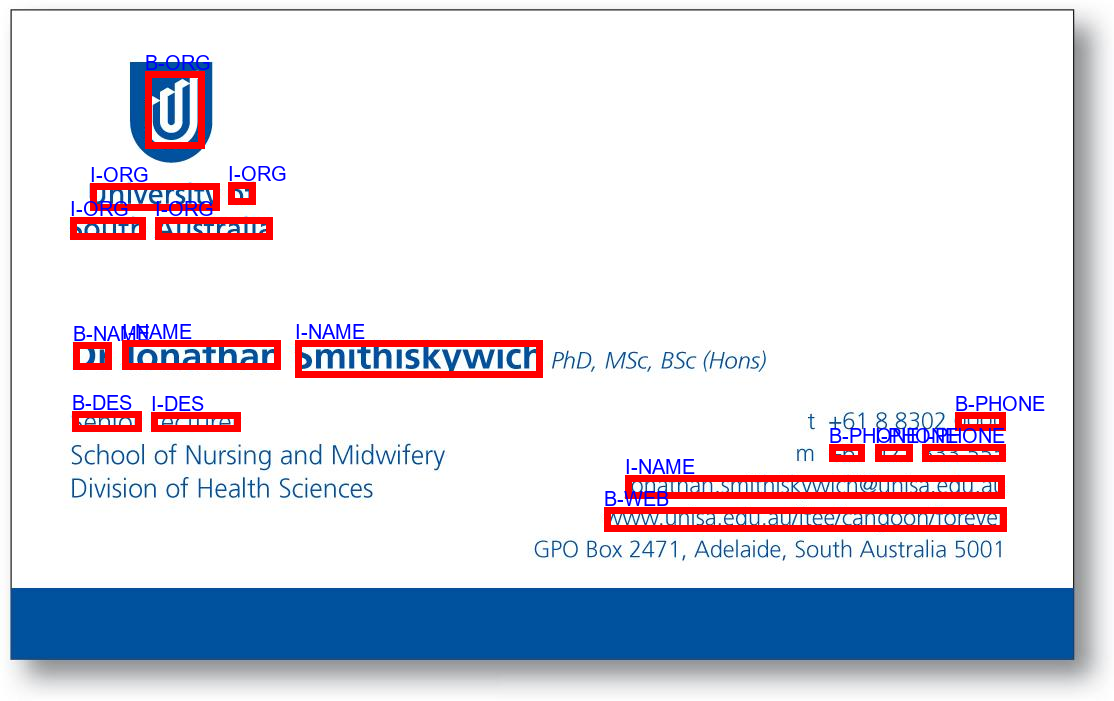

In [25]:
img

In [26]:
bb_df['label'] = bb_df['label'].apply(lambda x:x[2:])
bb_df.head()

C:\Users\Debajyoti\AppData\Local\Temp\ipykernel_13296\2286524247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df['label'] = bb_df['label'].apply(lambda x:x[2:])


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,3,1,1,1,145,71,59,77,34.092269,y,1,0,y,ORG
1,5,1,4,1,1,1,90,183,129,27,96.308664,university,12,2,university,ORG
2,5,1,4,1,1,2,228,182,27,22,96.744178,of,15,13,of,ORG
3,5,1,4,1,2,1,70,217,75,22,96.182354,south,21,16,south,ORG
4,5,1,4,1,2,2,155,217,117,22,96.182354,australia,31,22,australia,ORG


In [27]:
class groupgen():
    def __init__(self):
        self.id = 0
        self.text = ''

    def getgroup(self,text):
        if self.text == text:
            return self.id
        else: 
            self.id +=1
            self.text = text 
            return self.id 
        
grp_gen = groupgen()


In [28]:
bb_df['group'] = bb_df['label'].apply(grp_gen.getgroup)

C:\Users\Debajyoti\AppData\Local\Temp\ipykernel_13296\472836701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df['group'] = bb_df['label'].apply(grp_gen.getgroup)


In [29]:
bb_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label,group
0,5,1,3,1,1,1,145,71,59,77,34.092269,y,1,0,y,ORG,1
1,5,1,4,1,1,1,90,183,129,27,96.308664,university,12,2,university,ORG,1
2,5,1,4,1,1,2,228,182,27,22,96.744178,of,15,13,of,ORG,1
3,5,1,4,1,2,1,70,217,75,22,96.182354,south,21,16,south,ORG,1
4,5,1,4,1,2,2,155,217,117,22,96.182354,australia,31,22,australia,ORG,1
5,5,1,5,1,1,1,73,342,38,27,96.081749,dr,34,32,dr,NAME,2
6,5,1,5,1,1,2,122,340,158,29,93.298265,jonathan,43,35,jonathan,NAME,2
7,5,1,5,1,1,3,295,340,247,37,90.540634,smithiskywich,57,44,smithiskywich,NAME,2
12,5,1,6,1,1,1,72,411,69,20,96.450522,senior,83,77,senior,DES,3
13,5,1,6,1,1,2,151,412,89,19,96.979920,lecturer,92,84,lecturer,DES,3


In [30]:
bb_df[['left','top','width','height']] = bb_df[['left','top','width','height']].astype(int) 
bb_df['right'] = bb_df['left'] + bb_df['width']
bb_df['bottom'] = bb_df['top'] + bb_df['height']

C:\Users\Debajyoti\AppData\Local\Temp\ipykernel_13296\337114719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df[['left','top','width','height']] = bb_df[['left','top','width','height']].astype(int)
C:\Users\Debajyoti\AppData\Local\Temp\ipykernel_13296\337114719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df['right'] = bb_df['left'] + bb_df['width']
C:\Users\Debajyoti\AppData\Local\Temp\ipykernel_13296\337114719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [31]:
bb_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label,group,right,bottom
0,5,1,3,1,1,1,145,71,59,77,34.092269,y,1,0,y,ORG,1,204,148
1,5,1,4,1,1,1,90,183,129,27,96.308664,university,12,2,university,ORG,1,219,210
2,5,1,4,1,1,2,228,182,27,22,96.744178,of,15,13,of,ORG,1,255,204
3,5,1,4,1,2,1,70,217,75,22,96.182354,south,21,16,south,ORG,1,145,239
4,5,1,4,1,2,2,155,217,117,22,96.182354,australia,31,22,australia,ORG,1,272,239
5,5,1,5,1,1,1,73,342,38,27,96.081749,dr,34,32,dr,NAME,2,111,369
6,5,1,5,1,1,2,122,340,158,29,93.298265,jonathan,43,35,jonathan,NAME,2,280,369
7,5,1,5,1,1,3,295,340,247,37,90.540634,smithiskywich,57,44,smithiskywich,NAME,2,542,377
12,5,1,6,1,1,1,72,411,69,20,96.450522,senior,83,77,senior,DES,3,141,431
13,5,1,6,1,1,2,151,412,89,19,96.979920,lecturer,92,84,lecturer,DES,3,240,431


In [35]:
col_group = ['left','top','right','bottom','label','token','group']
group_tag_img = bb_df[col_group].groupby(by='group')

In [36]:
img_tagging = group_tag_img.agg({
    'left':min,
    'right':max,
    'top':min,
    'bottom':max,     
    'label':np.unique,
    'token':lambda x: " ".join(x)
})

C:\Users\Debajyoti\AppData\Local\Temp\ipykernel_13296\619186728.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  img_tagging = group_tag_img.agg({
C:\Users\Debajyoti\AppData\Local\Temp\ipykernel_13296\619186728.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  img_tagging = group_tag_img.agg({


In [37]:
img_tagging

,left,right,top,bottom,label,token
group,,,,,,
1,70,272,71,239,[ORG],y university of south australia
2,73,542,340,377,[NAME],dr jonathan smithiskywich
3,72,240,411,431,[DES],senior lecturer
4,829,1005,412,461,[PHONE],0000 61 422 333555
5,625,1004,475,498,[NAME],jonathan.smithiskywich@unisa.edu.au
6,604,1006,507,531,[WEB],www.unisa.edu.au/itee/cangoon/forever


In [41]:
from PIL import ImageFont, ImageDraw

img_bb = image.copy()
draw = ImageDraw.Draw(img_bb)

font = ImageFont.truetype("arial.ttf", 24) 

for l, r, t, b, label, token in img_tagging.values:
    draw.rectangle([(l, t), (r, b)], outline='red', width=5)
    draw.text((l, t - 20), label[0], font=font, fill='blue')


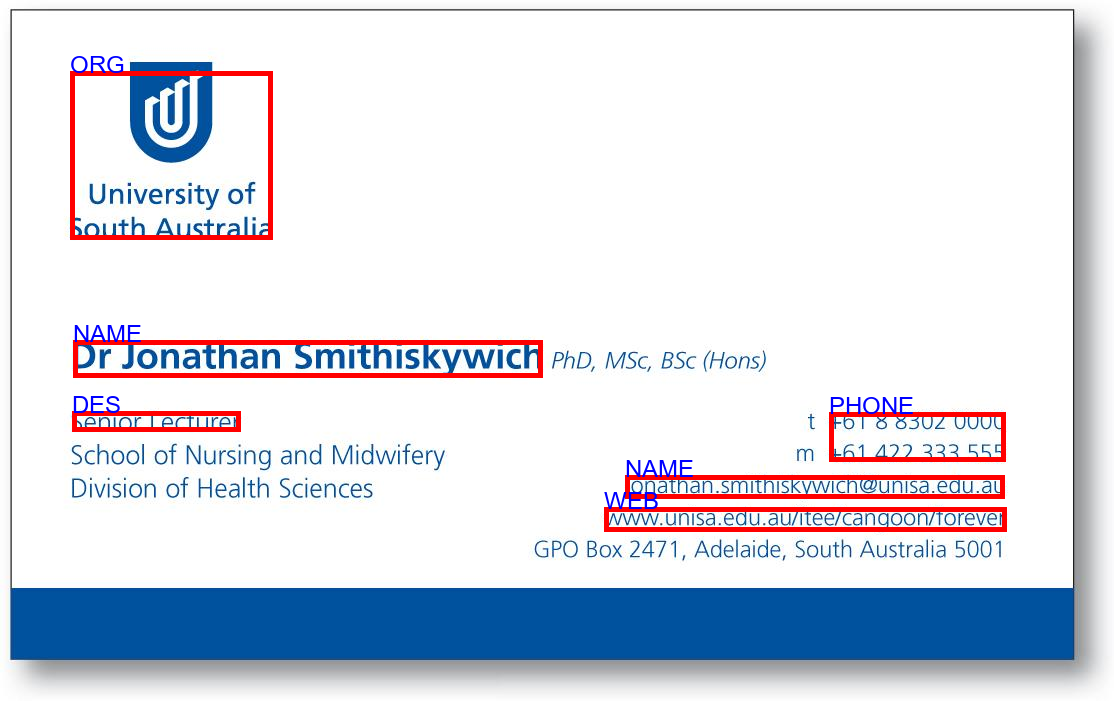

In [42]:
img_bb

In [44]:
import re

def parser(text, label):
    if label == 'PHONE':
        text = text.lower()
        text = re.sub(r'\D', '', text)  # Fixed incorrect regex

    elif label == 'EMAIL':
        text = text.lower()
        allow_special_chart = r'@_.\-'  # Use raw string
        text = re.sub(r'[^A-Za-z0-9' + allow_special_chart + r' ]', '', text)  # Fixed format issue

    elif label == 'WEB':
        text = text.lower()
        allow_special_char = r':/.%#\-'  # Use raw string
        text = re.sub(r'[^A-Za-z0-9' + allow_special_char + r' ]', '', text)  # Fixed format issue

    elif label in ('NAME', 'DES'):
        text = text.lower()
        text = re.sub(r'[^a-z]', '', text)  # Remove non-alphabetic characters
        text = text.title()  # Capitalize each word

    elif label == 'ORG':
        text = text.lower()
        text = re.sub(r'[^a-z0-9 ]', '', text)  # Allow alphanumeric and spaces
        text = text.title()  # Capitalize each word

    return text


In [45]:
parser('Debajyoti 123456 @34738725873','NAME')

'Debajyoti'

In [46]:
info_array = df_info[['token','label']].values
entities = {
    'NAME':[],
    'ORG':[],
    'DES':[],
    'PHONE':[],
    'EMAIL':[],
    'WEB':[]
}

previous = 'O'
for token,label in info_array:
    bio_tag = label[:1]
    label_tag = label[2:]

    text = parser(token,label_tag)

    if bio_tag in ('B','I'):
        if previous != label_tag:
            entities[label_tag].append(text)

        else:
            if bio_tag == 'B':
                entities[label_tag].append(text)

            else:
                if label_tag in ("NAME","ORG","DES"):
                    entities[label_tag][-1]=entities[label_tag][-1]+" "+text

                else:
                    entities[label_tag][-1] = entities[label_tag][-1]+text 
    
    previous = label_tag 

In [47]:
print(entities)

{'NAME': ['Dr Jonathan Smithiskywich', 'Jonathansmithiskywichunisaeduau'], 'ORG': ['Y University Of South Australia'], 'DES': ['Senior Lecturer'], 'PHONE': ['0000', '61422333555'], 'EMAIL': [], 'WEB': ['www.unisa.edu.au/itee/cangoon/forever']}
